In [1]:
from scipy import stats
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm 
import pylab as py 

## Dataset: Rain in Australia

### Problema a resolver

Predecir, en base a los datos meteorológicos del día actual, si el día de mañana va a llover.

## Análisis exploratorio inicial

In [2]:
# Se carga el dataset a partir del archivo CSV
dataset = pd.read_csv('dataset/weatherAUS.csv')

# Se muestran los primeros 10 registros
dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Resumen de 5 números para las variables numéricas
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
dataset[dataset.duplicated(keep=False)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


No existen observaciones duplicadas.

In [6]:
# Se crea un dataframe con información de porcentaje de nulos para las columnas
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'Porcentaje de nulos': percent_missing})

missing_value_df

,Porcentaje de nulos
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


## Descripción de variables

### Variable: Date

Indica la fecha en que fue realizada la observación.



In [7]:
tiene_duplicados_date = len(dataset[dataset.duplicated(subset=['Date'], keep=False)]) > 0
print('¿Valores duplicados por variable Date?: ', 'Sí' if tiene_duplicados_date else 'No')

tiene_duplicados_date_location = len(dataset[dataset.duplicated(subset=['Date', 'Location'], keep=False)]) > 0
print('¿Valores duplicados por variables Date y Location?: ', 'Sí' if tiene_duplicados_date_location else 'No')

¿Valores duplicados por variable Date?:  Sí
¿Valores duplicados por variables Date y Location?:  No


El hecho de que no existan duplicados por Date y Location sugiere que dada una fecha se registra como máximo una observación por estación meteorológica, lo cual tiene sentido.

<Axes: >

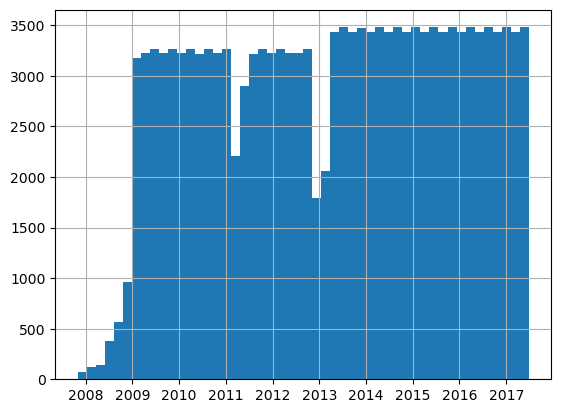

In [8]:
# Se genera un histograma para ver la completitud de las fechas en el rango de observaciones
date_to_datetime = pd.to_datetime(dataset['Date'])
date_to_datetime.hist(bins=50)

En el histograma se pueden observar un par de alteraciones entre los años 2011 y 2013 que determinaremos si se corresponden con falta de observaciones en dichos períodos (también podrían ser fallas en algunas estaciones meteorológicas).

In [9]:
# En el rango definido por las fechas mínima y máxima, se imprimen aquellas fechas para las cuales no hay observaciones
print(pd.date_range(start=date_to_datetime.min(), end=date_to_datetime.max()).difference(date_to_datetime))

DatetimeIndex(['2011-04-01', '2011-04-02', '2011-04-03', '2011-04-04',
               '2011-04-05', '2011-04-06', '2011-04-07', '2011-04-08',
               '2011-04-09', '2011-04-10', '2011-04-11', '2011-04-12',
               '2011-04-13', '2011-04-14', '2011-04-15', '2011-04-16',
               '2011-04-17', '2011-04-18', '2011-04-19', '2011-04-20',
               '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24',
               '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28',
               '2011-04-29', '2011-04-30', '2012-12-01', '2012-12-02',
               '2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06',
               '2012-12-07', '2012-12-08', '2012-12-09', '2012-12-10',
               '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14',
               '2012-12-15', '2012-12-16', '2012-12-17', '2012-12-18',
               '2012-12-19', '2012-12-20', '2012-12-21', '2012-12-22',
               '2012-12-23', '2012-12-24', '2012-12-25', '2012-12-26',
      

Efectivamente, no hubo observaciones en abril de 2011, diciembre de 2012, ni febrero de 2013.

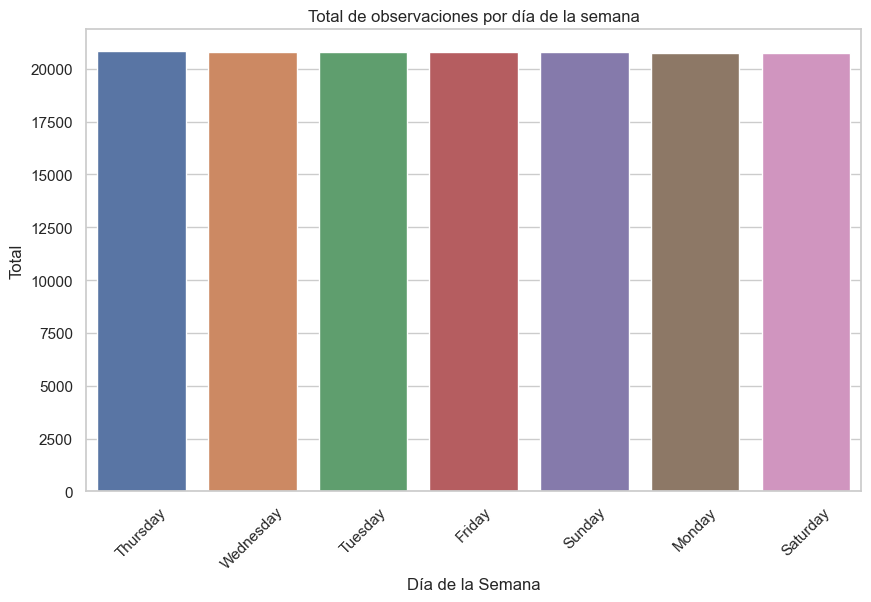

In [10]:
week_day = date_to_datetime.dt.day_name()

day_counts = week_day.value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)

plt.title('Total de observaciones por día de la semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total')
plt.xticks(rotation=45)

plt.show()

En el gráfico se puede observar que las observaciones están distribuidas uniformemente entre los días de la semana. Por lo tanto, se puede ver que ningún día se suspenden las observaciones.

### Variable: Location

Ubicación de la estación meteorológica donde se obtuvo la observación.

Tipo: Cualitativa Nominal.

In [11]:
print('Valores únicos: ',dataset['Location'].unique())
print('Cardinalidad: ', len(dataset['Location'].unique()))

Valores únicos:  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


No hay valores que sugieran errores en los datos, o nulos. En total hay 49 ubicaciones diferentes.

C:\Users\Usuario\anaconda3\envs\env_introia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\envs\env_introia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


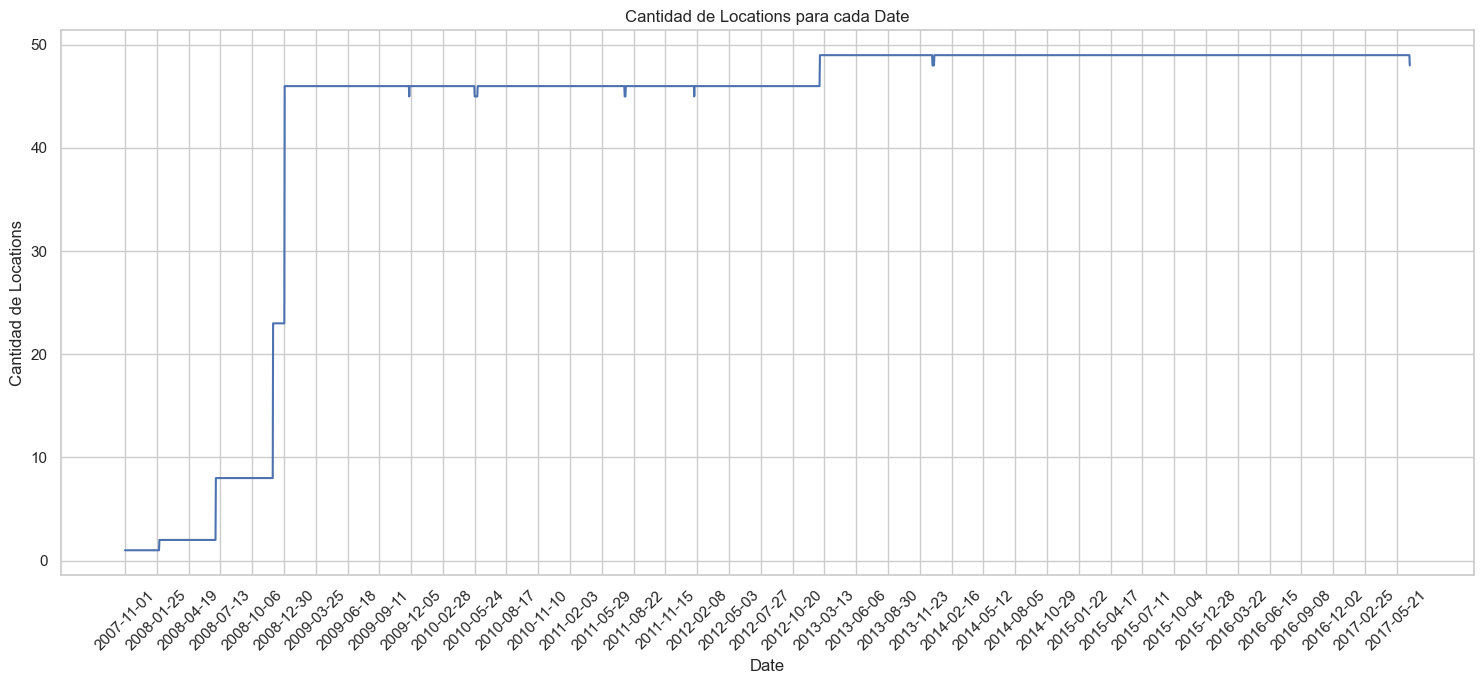

In [12]:
location_counts = dataset.groupby('Date')['Location'].count().reset_index()

location_counts.columns = ['Date', 'LocationCount']

plt.figure(figsize=(15, 7))
sns.lineplot(data=location_counts, x='Date', y='LocationCount')
plt.title('Cantidad de Locations para cada Date')
plt.xlabel('Date')
plt.ylabel('Cantidad de Locations')

num_dates = 40 
dates_to_show = location_counts['Date'][::len(location_counts)//num_dates]

plt.xticks(ticks=dates_to_show.index, labels=dates_to_show, rotation=45)
plt.tight_layout()
plt.show()

En este gráfico se puede observar que en cada observación no necesariamente se tiene información de todas las estaciones meteorológicas (49 en total para el dataset). Esto puede deberse a diversos motivos, como por ejemplo que fueron creándose en el correr del tiempo, o bien hubo inhabilitaciones temporales de las mismas.

### Variables: MinTemp, MaxTemp, Temp9am, Temp3pm

Temperaturas mínima, máxima a las 9am y 3pm en grados Celsius para la observación.

Tipo: Cuantitativa continua (de intervalo).

In [13]:
TEMPERATURE_VARS = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

missing_value_df.loc[TEMPERATURE_VARS]

,Porcentaje de nulos
MinTemp,1.020899
MaxTemp,0.866905
Temp9am,1.214767
Temp3pm,2.481094


Se puede notar que estas variables presentan nulos aunque en bajos porcentajes.

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

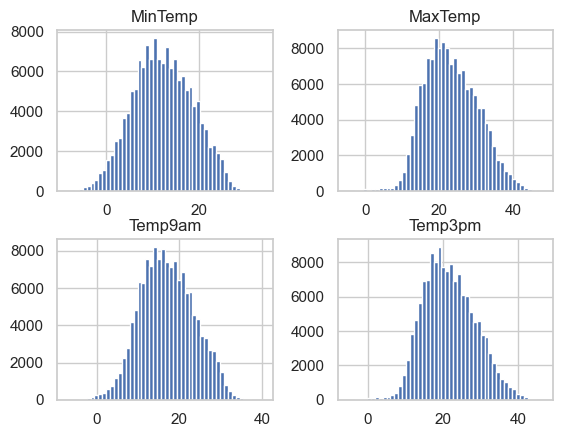

In [14]:
dataset[TEMPERATURE_VARS].hist(bins=50)

[Text(0.5, 1.0, 'Diagramas BoxPlot para variables de temperatura')]

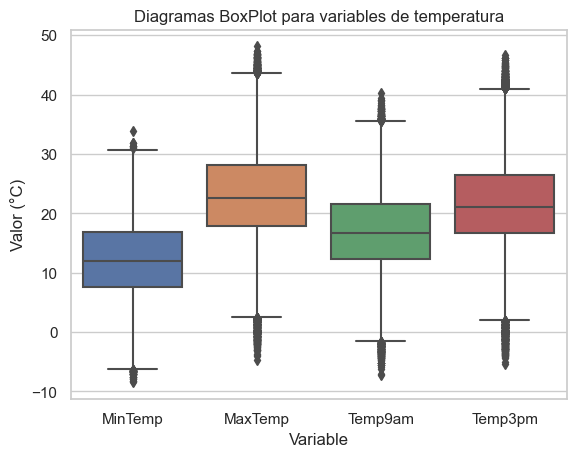

In [15]:

#melt_dataset = pd.melt(dataset.sample(1000))
melt_dataset = pd.melt(dataset)
melt_dataset = melt_dataset[melt_dataset['variable'].isin(TEMPERATURE_VARS)]
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (°C)'}, axis=1)
sns.boxplot(data = melt_dataset, x = 'Variable', y = 'Valor (°C)', labels=["Length"]).set(title='Diagramas BoxPlot para variables de temperatura')

A partir de estos diagramas BoxPlot sobre una muestra de 1000 observaciones podemos notar que la distribución de las temperaturas parece ser bastante simétrica y también que se presentan algunos valores atípicos que se deberá determinar luego qué impacto tiene sobre el problema y, eventualmente, realizar un tratamiento sobre ellos.

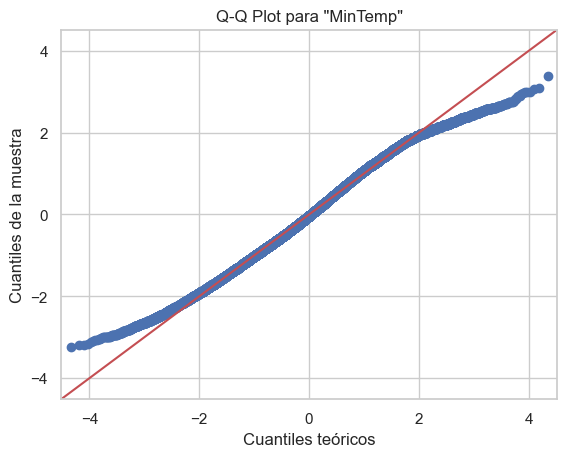

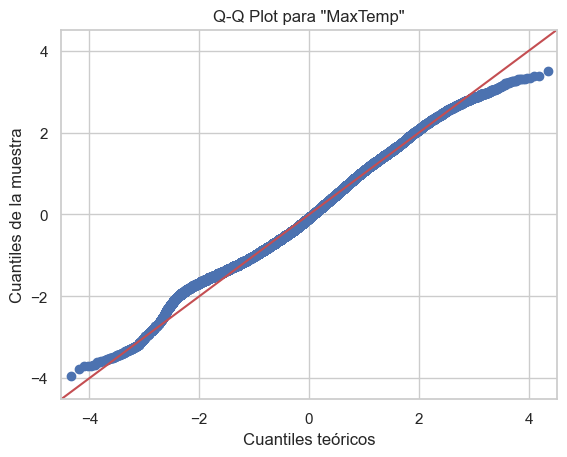

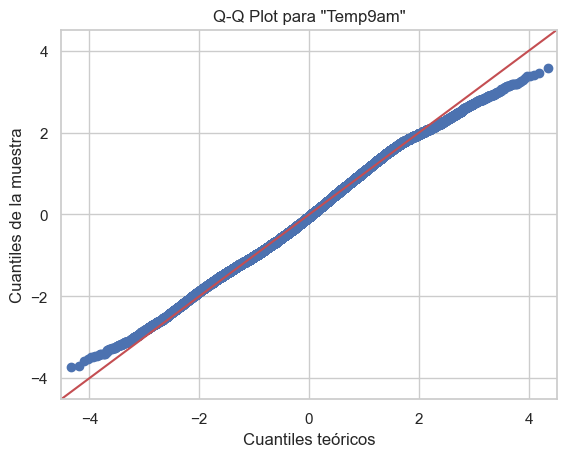

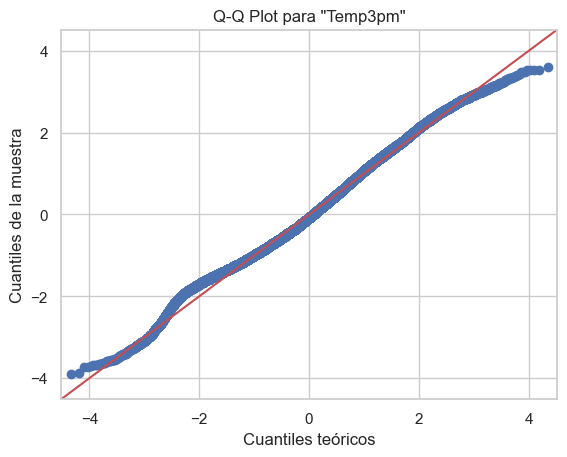

In [16]:
temp_vars_standarized = (dataset[TEMPERATURE_VARS] - dataset[TEMPERATURE_VARS].mean())/dataset[TEMPERATURE_VARS].std()
temp_vars_standarized = temp_vars_standarized.dropna()

sm.qqplot(temp_vars_standarized['MinTemp'], line='45')
py.title('Q-Q Plot para "MinTemp"')
py.xlabel('Cuantiles teóricos')
py.ylabel('Cuantiles de la muestra')

sm.qqplot(temp_vars_standarized['MaxTemp'], line='45') 
py.title('Q-Q Plot para "MaxTemp"')
py.xlabel('Cuantiles teóricos')
py.ylabel('Cuantiles de la muestra')

sm.qqplot(temp_vars_standarized['Temp9am'], line='45') 
py.title('Q-Q Plot para "Temp9am"')
py.xlabel('Cuantiles teóricos')
py.ylabel('Cuantiles de la muestra')

sm.qqplot(temp_vars_standarized['Temp3pm'], line='45') 
py.title('Q-Q Plot para "Temp3pm"')
py.xlabel('Cuantiles teóricos')
py.ylabel('Cuantiles de la muestra')

py.show() 

Observando los Q-Q plots se puede observar que para las cuatro variables de temperatura su distribución parece asemejarse bastante a una Normal. Los cuatro casos presentan colas livianas, sobre todo MinTemp.

### Variables: WindGustSpeed, WindSpeed9am, WindSpeed3pm

WindGustSpeed: Velocidad (km/h) de la ráfaga de viento más rápida en las 24 horas previas a la medianoche.

WindSpeed9am: Velocidad (km/h) del viento promediada en los 10 minutos previos a las 9am.

WindSpeed3pm: Velocidad (km/h) del viento promediada en los 10 minutos previos a las 3pm.

Tipo: Cuantitativa continua (de razón).

In [17]:
WIND_SPEED_VARS = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

missing_value_df.loc[WIND_SPEED_VARS]

,Porcentaje de nulos
WindGustSpeed,7.055548
WindSpeed9am,1.214767
WindSpeed3pm,2.105046


Las tres variables presentan nulos, pero se destaca WindGustSpeed con un 7.1% de los valores nulos.

array([[<Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>, <Axes: >]], dtype=object)

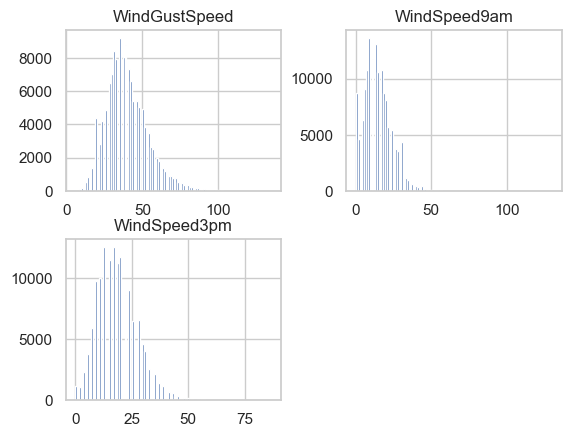

In [18]:
dataset[WIND_SPEED_VARS].hist(bins=100)

[Text(0.5, 1.0, 'Diagramas BoxPlot para variables de velocidad del viento')]

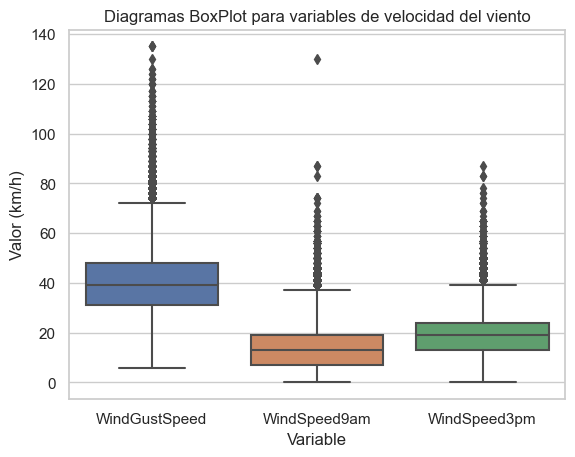

In [19]:
melt_dataset = pd.melt(dataset)
melt_dataset = melt_dataset[melt_dataset['variable'].isin(WIND_SPEED_VARS)]
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (km/h)'}, axis=1)
sns.boxplot(data = melt_dataset, x = 'Variable', y = 'Valor (km/h)', labels=["Length"]).set(title='Diagramas BoxPlot para variables de velocidad del viento')

A simple vista pueden observarse distribuciones algo oblicuas y con ciertas irregularidades en los valores del histograma.

In [20]:
# Se determina qué posibles valores tiene la velocidad del viento en las variables dadas, de forma de encontrar alguna particularidad.
unique_values_WindGustSpeed = dataset['WindGustSpeed'].unique()
unique_values_WindSpeed9am = dataset['WindSpeed9am'].unique()
unique_values_WindSpeed3pm = dataset['WindSpeed3pm'].unique()
unique_values_WindGustSpeed.sort()
unique_values_WindSpeed9am.sort()
unique_values_WindSpeed3pm.sort()

print('Valores únicos para WindGustSpeed: ', unique_values_WindGustSpeed)
print('Valores únicos para WindSpeed9am: ', unique_values_WindSpeed9am)
print('Valores únicos para WindSpeed3pm: ', unique_values_WindSpeed3pm)

Valores únicos para WindGustSpeed:  [  6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.  28.  30.
  31.  33.  35.  37.  39.  41.  43.  44.  46.  48.  50.  52.  54.  56.
  57.  59.  61.  63.  65.  67.  69.  70.  72.  74.  76.  78.  80.  81.
  83.  85.  87.  89.  91.  93.  94.  96.  98. 100. 102. 104. 106. 107.
 109. 111. 113. 115. 117. 120. 122. 124. 126. 130. 135.  nan]
Valores únicos para WindSpeed9am:  [  0.   2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.
  26.  28.  30.  31.  33.  35.  37.  39.  41.  43.  44.  46.  48.  50.
  52.  54.  56.  57.  59.  61.  63.  65.  67.  69.  72.  74.  83.  87.
 130.  nan]
Valores únicos para WindSpeed3pm:  [ 0.  2.  4.  6.  7.  9. 11. 13. 15. 17. 19. 20. 22. 24. 26. 28. 30. 31.
 33. 35. 37. 39. 41. 43. 44. 46. 48. 50. 52. 54. 56. 57. 59. 61. 63. 65.
 67. 69. 72. 74. 76. 78. 83. 87. nan]


Para las tres variables tenemos que los valores, a pesar de corresponder a variables teóricamente continuas, son discretos y no tenemos decimales. Esto explica por qué en el histograma se pueden llegar a ver algunos saltos cuando se tienen muchos bins.

### Variables: Humidity9am, Humidity3pm

Porcentaje de humedad a las 9am y 3pm.

Tipo: Cuantitativa continua (de razón)

In [21]:
HUMIDITY_VARS = ['Humidity9am', 'Humidity3pm']

missing_value_df.loc[HUMIDITY_VARS]

,Porcentaje de nulos
Humidity9am,1.824557
Humidity3pm,3.098446


array([[<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>]], dtype=object)

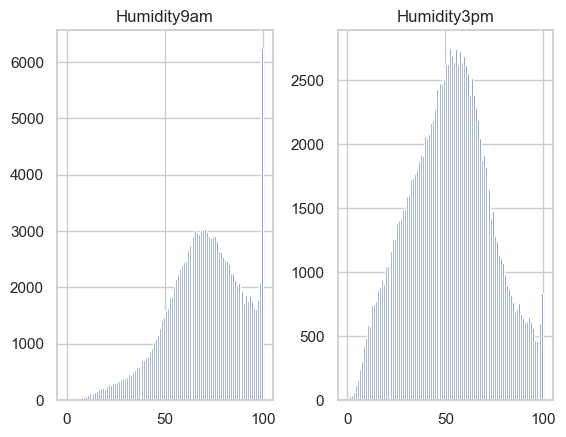

In [22]:
dataset[HUMIDITY_VARS].hist(bins=100)

En ambos histogramas puede observarse una distribución que no son simétricas, acumulando muchos valores sobre el extremo derecho. Esto puede deberse a que pasado cierto umbral de medición, el instrumento devuelva siempre el valor máximo o un valor cercano (99% o 100%).

[Text(0.5, 1.0, 'Diagramas BoxPlot para variables de porcentaje de humedad')]

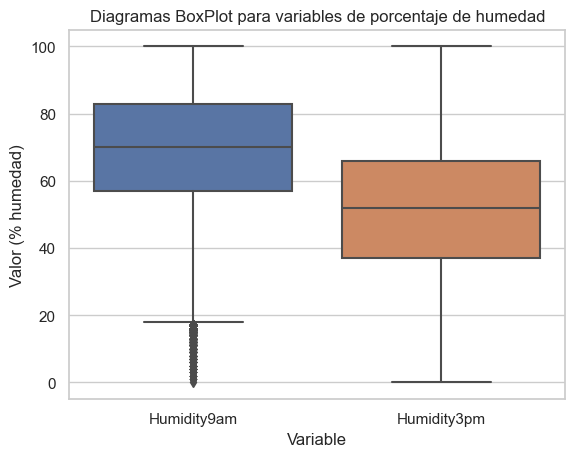

In [23]:
melt_dataset = pd.melt(dataset)
melt_dataset = melt_dataset[melt_dataset['variable'].isin(HUMIDITY_VARS)]
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (% humedad)'}, axis=1)
sns.boxplot(data = melt_dataset, x = 'Variable', y = 'Valor (% humedad)', labels=["Length"]).set(title='Diagramas BoxPlot para variables de porcentaje de humedad')

In [24]:
# Se determinan qué valores toman las variables
unique_values_Humidity9am = dataset['Humidity9am'].unique()
unique_values_Humidity3pm = dataset['Humidity3pm'].unique()
unique_values_Humidity9am.sort()
unique_values_Humidity3pm.sort()

print('Valores únicos para Humidity9am: ', unique_values_Humidity9am)
print('Valores únicos para Humidity3pm: ', unique_values_Humidity3pm)

Valores únicos para Humidity9am:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.  nan]
Valores únicos para Humidity3pm:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  8

Ambas variables presentan valores enteros entre 0 y 100.

### Variables: Pressure9am, Pressure3pm

Presión atmosférica (hpa) reducida al nivel del mar a las 9am y 3pm.

Tipo: Cuantitativa continua (de razón)

In [25]:
PRESSURE_VARS = ['Pressure9am', 'Pressure3pm']

missing_value_df.loc[PRESSURE_VARS]

,Porcentaje de nulos
Pressure9am,10.356799
Pressure3pm,10.331363


array([[<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>]], dtype=object)

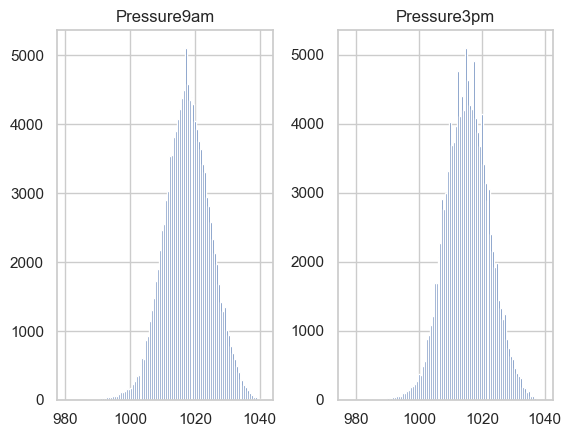

In [26]:
dataset[PRESSURE_VARS].hist(bins=100)

[Text(0.5, 1.0, 'Diagramas BoxPlot para variables de presión atmosférica')]

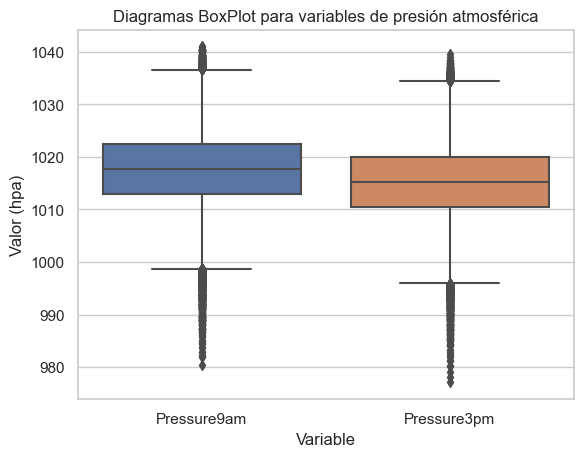

In [27]:
melt_dataset = pd.melt(dataset)
melt_dataset = melt_dataset[melt_dataset['variable'].isin(PRESSURE_VARS)]
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (hpa)'}, axis=1)
sns.boxplot(data = melt_dataset, x = 'Variable', y = 'Valor (hpa)', labels=["Length"]).set(title='Diagramas BoxPlot para variables de presión atmosférica')

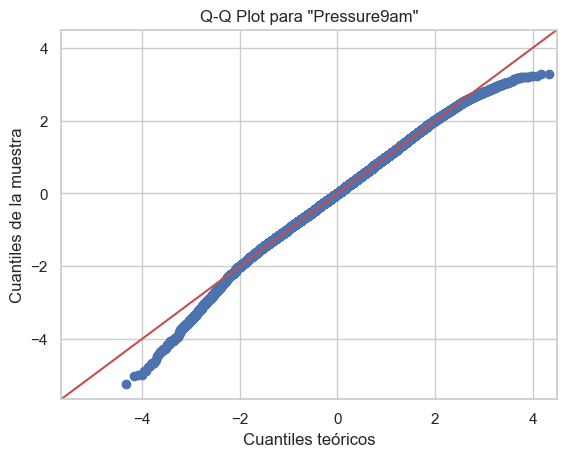

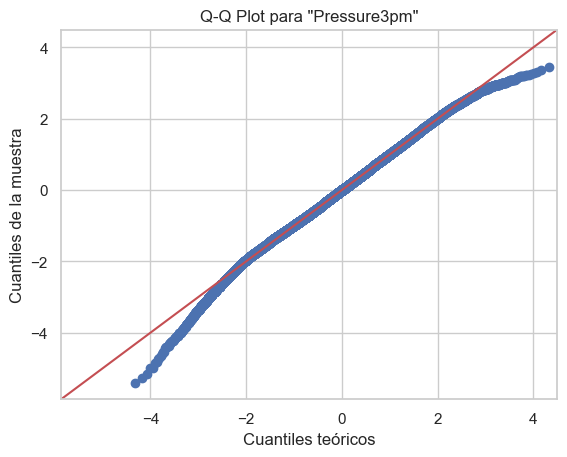

In [28]:
pressure_vars_standarized = (dataset[PRESSURE_VARS] - dataset[PRESSURE_VARS].mean())/dataset[PRESSURE_VARS].std()
pressure_vars_standarized = pressure_vars_standarized.dropna()

sm.qqplot(pressure_vars_standarized['Pressure9am'], line='45')
py.title('Q-Q Plot para "Pressure9am"')
py.xlabel('Cuantiles teóricos')
py.ylabel('Cuantiles de la muestra')

sm.qqplot(pressure_vars_standarized['Pressure3pm'], line='45') 
py.title('Q-Q Plot para "Pressure3pm"')
py.xlabel('Cuantiles teóricos')
py.ylabel('Cuantiles de la muestra')


py.show() 

Tal como se puede apreciar tanto en los BoxPlots como en los gráficos cuantil-cuantil, ambas variables presentan distribuciones que se acercan bastante a la Normal, pero en los dos casos con colas pesadas a la izquierda.

### Variable: Rainfall

Cantidad de lluvia reportada en el día en mm.

Tipo: Cuantitativa continua (de razón)

In [29]:
missing_value_df.loc['Rainfall']

Porcentaje de nulos    2.241853
Name: Rainfall, dtype: float64

<Axes: >

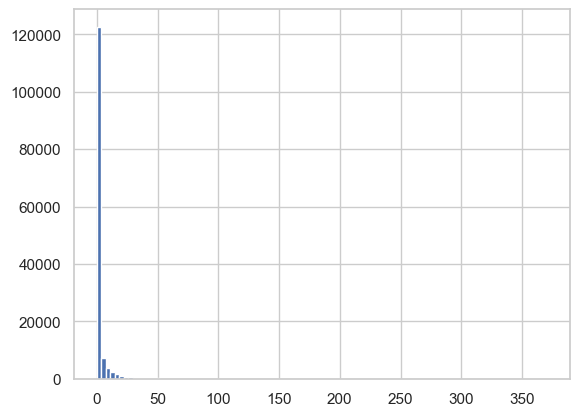

In [30]:
dataset['Rainfall'].hist(bins=100)

En este caso la distribución de los datos claramente no es normal y se puede apreciar la gran cantidad de días sin acumulados de lluvia registrados en el dataset (la mayoría de las observaciones).

In [31]:
dataset['Rainfall'].value_counts()

Rainfall
0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: count, Length: 681, dtype: int64

### Variable: Evaporation

Evaporación de clase A a las 9am para las 24 horas previas.

Tipo: Cuantitativa continua (de razón)

In [32]:
missing_value_df.loc['Evaporation']

Porcentaje de nulos    43.166506
Name: Evaporation, dtype: float64

Este caso presenta una gran cantidad de nulos que hay que analizar su causa.

<Axes: >

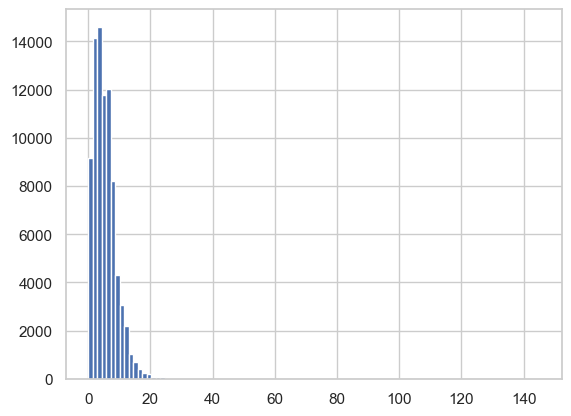

In [33]:
dataset['Evaporation'].hist(bins=100)

Se observa una distribución oblicua con una cola más pesada hacia la derecha. A la izquierda está truncada por el valor 0, que es el mínimo que puede tomar.

[Text(0.5, 1.0, 'Diagrama BoxPlot para Evaporation')]

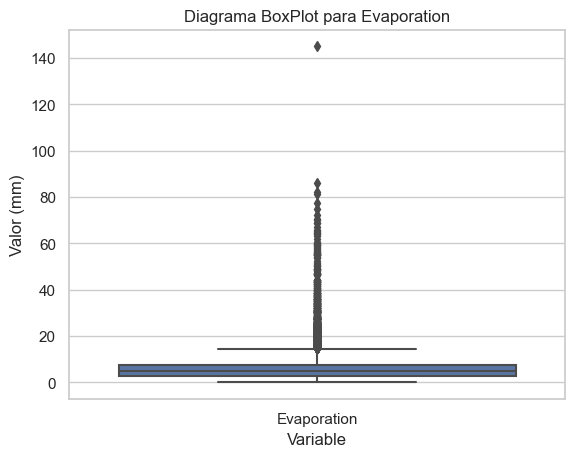

In [34]:
melt_dataset = pd.melt(dataset)
melt_dataset = melt_dataset[melt_dataset['variable'] == 'Evaporation']
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (mm)'}, axis=1)
sns.boxplot(data = melt_dataset, x = 'Variable', y = 'Valor (mm)', labels=["Length"]).set(title='Diagrama BoxPlot para Evaporation')

### Variable: Sunshine

Número de horas de sol brillante en el día.

Tipo: Cuantitativa continua (de intervalo).

In [35]:
missing_value_df.loc['Sunshine']

Porcentaje de nulos    48.009762
Name: Sunshine, dtype: float64

En esta variable hay una cantidad considerable de nulos que llama mucho la atención. A continuación se intenta determinar la causa.

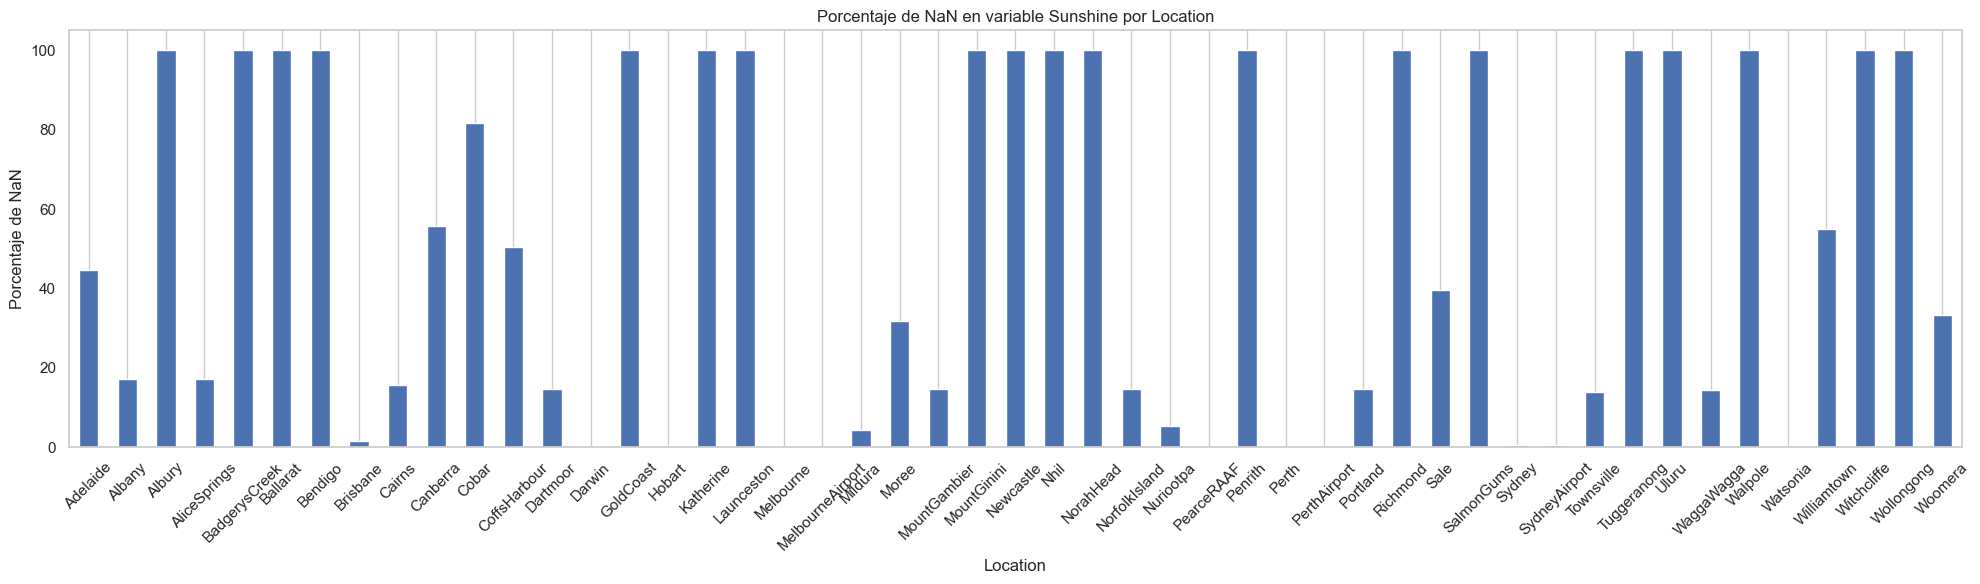

In [44]:

# Se grafica el porcentaje de nulos agrupados por Location para la variable Sunshine
nan_porcentajes = dataset.groupby('Location')['Sunshine'].apply(lambda x: (x.isna().sum() / len(x)) * 100)

plt.figure(figsize=(20, 6))
nan_porcentajes.plot(kind='bar')
plt.title('Porcentaje de NaN en variable Sunshine por Location')
plt.xlabel('Location')
plt.ylabel('Porcentaje de NaN')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Es posible observar que en muchas ubicaciones no se está registrando esta variable, mientras que en otras no hay valores faltantes. Estas irregularidades tienen que ser tenidas en cuenta al momento de aplicar el modelo que resuelva el problema.

<Axes: >

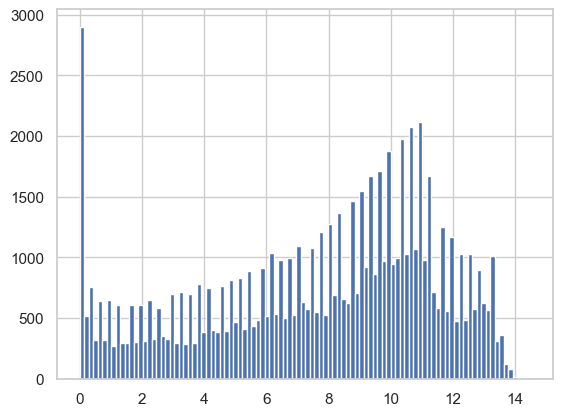

In [45]:
dataset['Sunshine'].hist(bins=100)

### Variables: WindGustDir, WindDir9am y WindDir3pm

WindGustDir: Dirección de la ráfaga más fuerte de viento en las 24 horas previas a la medianoche.
WindDir9am: Dirección del viento a las 9am.
WindDir3pm: Dirección del viento a las 3pm.

Tipo: Cualitativa ordinal. En este caso puede interpretarse que hay un orden cíclico de los puntos cardinales, aunque tal vez lo más simple puede ser considerarla como cualitativa nominal.

In [46]:
WIND_DIR_VARS = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

print('Valores únicos (WindGustDir): ',dataset['WindGustDir'].unique())
print('Cardinalidad (WindGustDir): ', len(dataset['WindGustDir'].unique()))
print('')
print('Valores únicos (WindDir9am): ',dataset['WindDir9am'].unique())
print('Cardinalidad (WindDir9am): ', len(dataset['WindDir9am'].unique()))
print('')
print('Valores únicos (WindDir3pm): ',dataset['WindDir3pm'].unique())
print('Cardinalidad (WindDir3pm): ', len(dataset['WindDir3pm'].unique()))

Valores únicos (WindGustDir):  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Cardinalidad (WindGustDir):  17

Valores únicos (WindDir9am):  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Cardinalidad (WindDir9am):  17

Valores únicos (WindDir3pm):  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Cardinalidad (WindDir3pm):  17


Para estas tres variables tenemos 16 valores posibles excluyendo NaN, los cuales representan las posibles subdiviones que se pueden hacer sobre los puntos cardinales.

### Variables: Cloud9am, Cloud3pm

Fracción del cielo oscurecida por las nubes a las 9am y 3pm respectivamente (en oktas). Registra cuántas octavas partes del cielo están oscurecidas por las nubes. 0 indica cielo completamente despejado mientras que un 8 indica que está completamente nublado.

Tipo: Cuantitativa discreta (de razón).

In [56]:
CLOUD_VARS = ['Cloud9am', 'Cloud3pm']

missing_value_df.loc[PRESSURE_VARS]

,Porcentaje de nulos
Pressure9am,10.356799
Pressure3pm,10.331363


In [60]:
# Se determinan 
dataset['Cloud9am'].value_counts()

Cloud9am
7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: count, dtype: int64

In [54]:
dataset['Cloud3pm'].value_counts()

Cloud3pm
7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: count, dtype: int64

Se puede observar un valor fuera de lo común que es el 9, que tal vez se deba a un error de medición o tenga otro significado ya que el máximo debería ser 8.

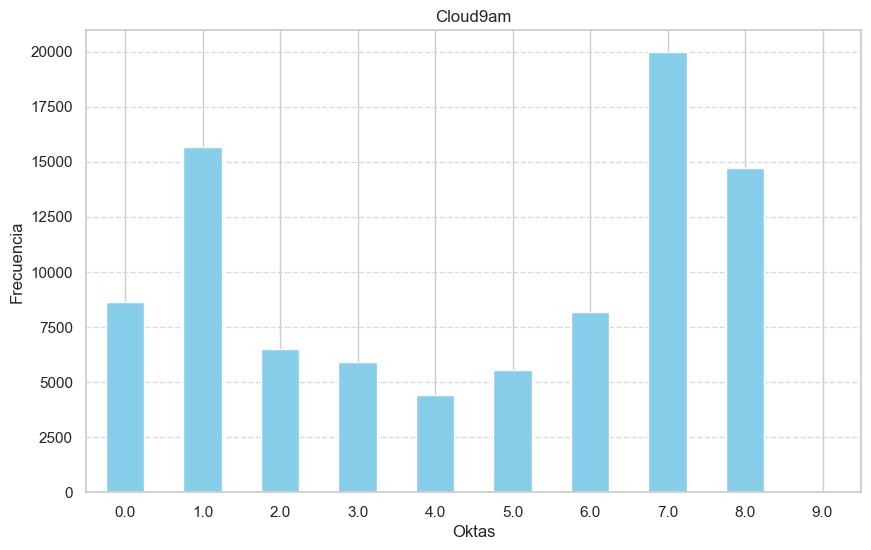

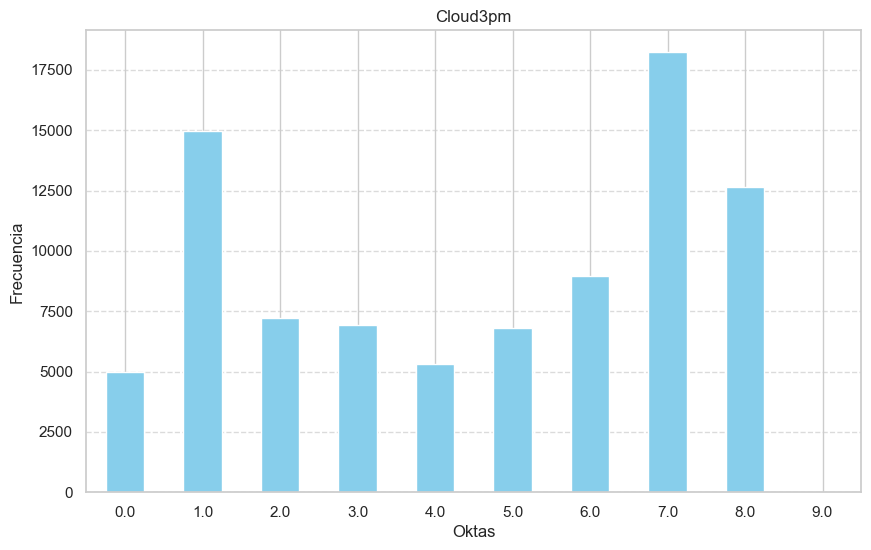

In [59]:
# Se grafica la frecuencia de los diferentes valores para ambas variables

cloud_counts = dataset['Cloud9am'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cloud_counts.plot(kind='bar', color='skyblue')
plt.title('Cloud9am')
plt.xlabel('Oktas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

cloud_counts = dataset['Cloud3pm'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cloud_counts.plot(kind='bar', color='skyblue')
plt.title('Cloud3pm')
plt.xlabel('Oktas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Las frecuencias de valores son bastante similares para 9am y 3pm. Hay dos valores que predominan que son 1 y 7.

### Variable: RainToday

Es "Yes" si la cantidad de lluvia en las 24 horas previas a las 9am es mayor a 1 mm, "No" en caso contrario. Es una forma de evaluar si llovió en el día en que se realizó la observación.

Tipo: Categórica nominal.

In [61]:
dataset['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

Efectivamente, los posibles valores son "Yes" y "No" (además de NaN).

In [62]:
dataset['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

Se observa que la mayoría de los días no se registraron lluvias significativas.